In [2]:
import numpy as np  
import matplotlib.pyplot as plt

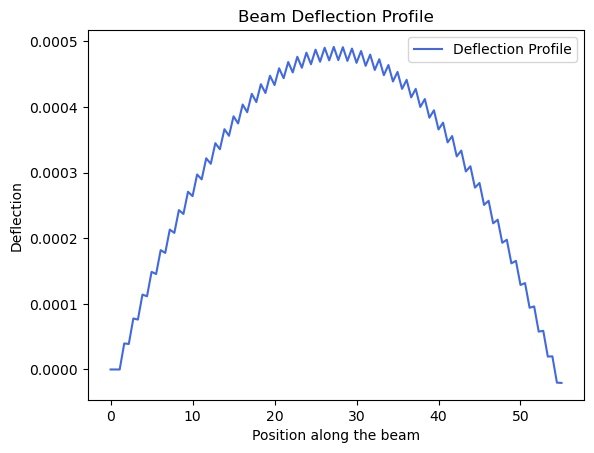

In [26]:
def compute_deflections(len, uniform_load, youngs_modulus, moment_of_inertia):
    
    num_intervals = 100
    x_values = np.linspace(0, len, num_intervals)
    deflection = np.zeros_like(x_values)
    curvature = np.zeros_like(x_values)
    for i in range(2, num_intervals): #inifinte approximation
        dx = x_values[i] - x_values[i - 1]
        curvature[i] = -uniform_load / (youngs_modulus * moment_of_inertia) * (x_values[i] - len / 2) / 2
        deflection[i] = deflection[i - 2] + curvature[i - 1] * dx**2 / 2

    return x_values, deflection

#SI units
mass=50964000 
l= 55
w=5
h=2  
uniform_load = mass/l 
y_mod = 2.1*10**(11)  
I_m = w*h**3/12

x_values, deflection_values = compute_deflections(l, uniform_load, y_mod, I_m)

# Check that the maximum deflection is less than the allowable deflection
assert max(deflection_values) < l/300, "Deflection is too high!"
# Plot 
plt.plot(x_values, deflection_values, label="Deflection Profile", color="royalblue")
plt.xlabel("Position along the beam")
plt.ylabel("Deflection")
plt.title("Beam Deflection Profile")
plt.legend()
plt.show()



Adjustments needs to be done.


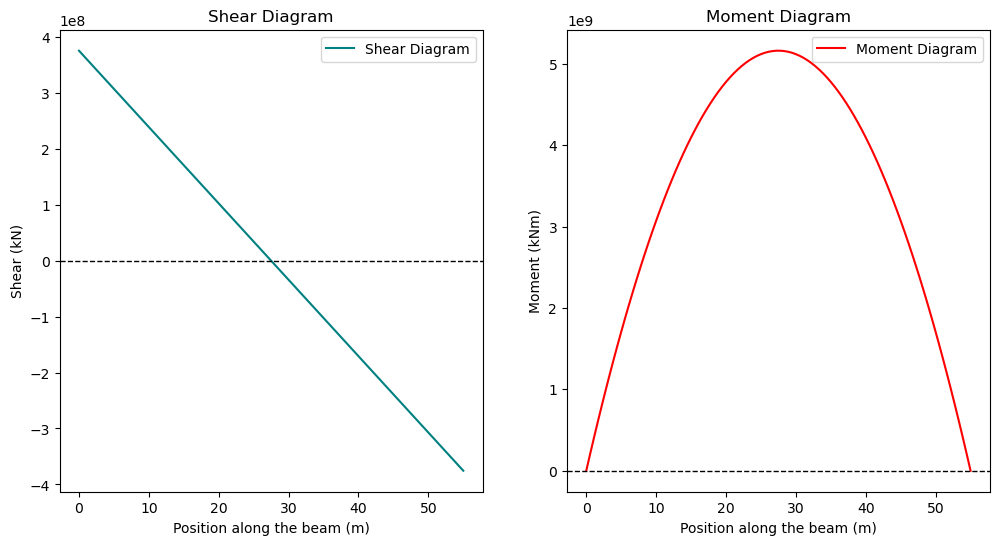

In [24]:
def calculate_shear_moment(len, uniform_load, p_loadxn, p_load):
    num_intervals = 100
    x_values = np.linspace(0, len, num_intervals)
    shear = np.zeros_like(x_values)
    moment = np.zeros_like(x_values)

    tot_uload = uniform_load * len
    p_load_moment = p_load * (len - p_loadxn)
    total_moment = p_load_moment
    R_a = (tot_uload + p_load) / 2
    R_b = tot_uload + p_load - R_a

    for i, x in enumerate(x_values):
        shear[i] = R_a - uniform_load * x
        if x >= p_loadxn:
            shear[i] -= p_load
        moment[i] = R_a * x - 0.5 * uniform_load * x**2
        if x >= p_loadxn:
            moment[i] -= p_load * (x - p_loadxn)

    return x_values, shear, moment

def check_strength_design(moment_values, shear_values, yield_strength, factor_of_safety):
    normal_stress = moment_values / I_m 
    shear_stress = shear_values / (w * h) 
    von_mises = np.sqrt(normal_stress**2 + 3 * shear_stress**2)

    max_stress = yield_strength / factor_of_safety

    #assertition; if true, nothing happens, if false, error
    design_satisfactory = np.all(von_mises <= max_stress)

    return design_satisfactory


#SI units
uload_new = uniform_load+ 244.121 #50 lb/ft^2 to kN/m^2
p_loadxn = l/2  
p_load = 32658.651  
yield_strength = 344.73786466 *10**6 #50 ksi to Pa
factor_of_safety = 2

x_values, shear_values, moment_values = calculate_shear_moment(l, uniform_load, p_loadxn, p_load)
design_satisfactory = check_strength_design(moment_values, shear_values, yield_strength, factor_of_safety)

if design_satisfactory == True:
    print("The design meets the safty factors.")
else:
    print("Adjustments needs to be done.")


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(x_values, shear_values, label="Shear Diagram", color='teal')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.xlabel("Position along the beam (m)")
plt.ylabel("Shear (kN)")
plt.title("Shear Diagram")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x_values, moment_values, label="Moment Diagram", color='red')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.xlabel("Position along the beam (m)")
plt.ylabel("Moment (kNm)")
plt.title("Moment Diagram")
plt.legend()
plt.show()
